# Text Analysis on the 20 Newsgroups Dataset: Preprocessing and Sentiment Evaluation

The aim of this project is to preprocess textual data from the "misc.forsale" category of the 20 Newsgroups dataset and perform sentiment analysis on it using the VADER (Valence Aware Dictionary and sEntiment Reasoner) model.

## Dataset

The 20 Newsgroups dataset is a well-known collection of approximately 20,000 newsgroup documents, which have been classified into 20 different categories.

In [249]:
from sklearn.datasets import fetch_20newsgroups
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download

In [251]:
# Import the necessary function from scikit-learn to fetch newsgroup data
from sklearn.datasets import fetch_20newsgroups

# Define the specific category to load. In this case, it's 'misc.forsale'.
categories = ['misc.forsale']

# Fetch the data corresponding to the 'misc.forsale' category.
# The subset='all' parameter specifies that we want to load all available posts in this category,
# both from the training and test sets.
# The remove parameter specifies the parts of the emails to be removed before loading the data.
# 'headers', 'footers', and 'quotes' are often removed to ensure that the classification algorithms 
# focus on the main body content of the posts rather than metadata and quoted replies.
data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Extract the loaded documents from the fetched data. 
# 'documents' is a list where each element is the text of a single post from the 'misc.forsale' category.
documents = data.data


### Import Required Library

- `from sklearn.datasets import fetch_20newsgroups`
  - **fetch_20newsgroups**: This function is part of the `sklearn.datasets` module and is used specifically for fetching the 20 Newsgroups dataset. It is a convenient loader that downloads the dataset from the internet.

### Define the Category to Load

- `categories = ['misc.forsale']`
  - This line specifies which categories of posts to load from the dataset. Here, only posts from the `misc.forsale` category are fetched. This category typically includes posts related to sales and advertisements, making it suitable for analyses related to commerce, pricing strategies, and market trends.

### Load the Dataset

- `data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))`
  - **Parameters Explained**:
    - `subset='all'`: Loads both the training and testing set of the dataset.
    - `categories=categories`: Filters the dataset to include only the posts from the specified categories.
    - `remove=('headers', 'footers', 'quotes')`: This argument specifies the parts of the emails to be removed before loading the data. Removing these parts helps in focusing the analysis on the main body of the posts, avoiding bias introduced by email headers, signatures, or quoted texts from previous messages.

### Extract the Documents

- `documents = data.data`
  - After loading the dataset, this line extracts the actual content of the posts. `data.data` contains the list of posts, where each post is a string. These posts have been preprocessed as specified (headers, footers, and quotes removed), making them ready for further text processing tasks like tokenization, stemming, or lemmatization.


In [253]:
len(documents)

975

In [254]:
example_text = documents[3]
example_text

'[ Article crossposted from misc.forsale.computers.pc-clone ]\n[ Author was Mark Wilson ]\n[ Posted on Fri, 16 Apr 1993 13:18:42 GMT ]\n\nUPDATE ("for sale" items):\n(All plus shipping)\n\n1. CORE 72Mb Hard drive, model AT72, works fine,\n        5 1/4" full-height, reduced to $90\n\n2. MFM controller for the above, would like to sell\n        with above, have $15 asking price,\n        but will sell with #1 above for $100 combined.\n\n3. AT-style case $10 (in process of selling)\n\n4. VGA card, 512K, now asking $25\n\n5. 386 Max, version 6.0, now asking $25\n\nPlease email mark@ocsmd.ocs.com or use phone #s below.\n\n- Mark\n--\n-------------------------------------------------------------------------------\nMark Wilson, Online Computer Systems.  1-800-922-9204 or 1-301-601-2215\n(Try email address mark@ocsmd.ocs.com....)\nThis file .disclaims everything signed with my .signature, I .mean it!\n-------------------------------------------------------------------------------\n\n--\n-----

## Data Cleaning

### 1. Removing Special Characters

In [260]:
def remove_special_characters(text):
    """
    Removes all special characters from the text, leaving only alphabets, numbers, and spaces.
    
    Args:
    text (str): The input text string from which special characters need to be removed.

    Returns:
    str: A string with all special characters removed.
    """
    # Use a regular expression to replace all characters that are NOT letters, numbers, or spaces
    # with an empty string. The regex pattern [^a-zA-Z0-9\s] matches any character that is not
    # a letter (a-z, A-Z), a number (0-9), or a whitespace character (\s).
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

text_no_special_chars = remove_special_characters(example_text)
print("Text after Removing Special Characters:\n", text_no_special_chars)


Text after Removing Special Characters:
  Article crossposted from miscforsalecomputerspcclone 
 Author was Mark Wilson 
 Posted on Fri 16 Apr 1993 131842 GMT 

UPDATE for sale items
All plus shipping

1 CORE 72Mb Hard drive model AT72 works fine
        5 14 fullheight reduced to 90

2 MFM controller for the above would like to sell
        with above have 15 asking price
        but will sell with 1 above for 100 combined

3 ATstyle case 10 in process of selling

4 VGA card 512K now asking 25

5 386 Max version 60 now asking 25

Please email markocsmdocscom or use phone s below

 Mark


Mark Wilson Online Computer Systems  18009229204 or 13016012215
Try email address markocsmdocscom
This file disclaims everything signed with my signature I mean it




Mark Wilson Online Computer Systems  18009229204 or 13016012215
Try email address markocsmdocscom
This file disclaims everything signed with my signature I mean it


### Function: `remove_special_characters`

- **Purpose**: Cleans a string by removing any special characters that may affect subsequent text analysis or processing. This includes punctuation, special symbols, and any non-standard characters not typically required for text analysis tasks such as tokenization, NLP, or text classification.

- **Parameter**:
  - `text (str)`: The input text to be processed. This is the string from which all special characters will be removed.

- **Returns**:
  - `str`: The cleaned string with all special characters removed, leaving only alphanumeric characters and whitespace.

### Regex Explanation

- **Regex Used**: `[^a-zA-Z0-9\s]`
  - This pattern is used to identify characters that are not letters (`a-zA-Z`), not numbers (`0-9`), and not whitespace (`\s`). The caret (`^`) at the beginning of the bracket expression negates the set, matching any character not listed.

- **Function Used**: `re.sub`
  - `re.sub(pattern, repl, string, count=0, flags=0)`: A method from Python's `re` module that replaces the parts of the string that match the regex pattern with a replacement string. In this case, it replaces matched special characters with an empty string (`''`), effectively removing them.


This function is useful in various data preprocessing scenarios where you need to standardize text data by removing extraneous characters that do not contribute to the analysis, such as in sentiment analysis, text classification, or when preparing data for machine learning models.


### 2. Removing Numbers

Sometimes, numbers within the text may not be relevant for the analysis, especially when focusing purely on linguistic data.

In [265]:
def remove_numbers(text):
    """
    Remove all numeric digits from the input text.

    Args:
    text (str): The string from which to remove numbers.

    Returns:
    str: The modified string with all digits removed.
    """
    # The re.sub function is used here to replace all sequences of digits (denoted by '\d+')
    # with an empty string. The '\d+' pattern matches one or more digits in the text.
    text = re.sub(r'\d+', '', text)
    return text
text_no_numbers = remove_numbers(text_no_special_chars)
print("Text after Removing Numbers:\n", text_no_numbers)


Text after Removing Numbers:
  Article crossposted from miscforsalecomputerspcclone 
 Author was Mark Wilson 
 Posted on Fri  Apr   GMT 

UPDATE for sale items
All plus shipping

 CORE Mb Hard drive model AT works fine
          fullheight reduced to 

 MFM controller for the above would like to sell
        with above have  asking price
        but will sell with  above for  combined

 ATstyle case  in process of selling

 VGA card K now asking 

  Max version  now asking 

Please email markocsmdocscom or use phone s below

 Mark


Mark Wilson Online Computer Systems   or 
Try email address markocsmdocscom
This file disclaims everything signed with my signature I mean it




Mark Wilson Online Computer Systems   or 
Try email address markocsmdocscom
This file disclaims everything signed with my signature I mean it


### Function: `remove_numbers`

- **Purpose**: To clean a string by removing all numeric digits. This is useful in scenarios where numbers do not provide meaningful information for analysis, such as in textual sentiment analysis or when analyzing purely descriptive data.

- **Parameter**:
  - `text (str)`: The input text to be processed. This is the string from which all numeric digits will be removed.

- **Returns**:
  - `str`: The cleaned string with all numeric digits removed.

### Regex Explanation

- **Regex Used**: `'\d+'`
  - This regex pattern is used to find and match sequences of digits in the text. Here, `\d` represents any digit (equivalent to `[0-9]`), and `+` signifies one or more occurrences of the preceding element (digits in this case).

- **Function Used**: `re.sub`
  - `re.sub(pattern, repl, string, count=0, flags=0)`: This method from Python's `re` module replaces parts of the string that match the regex pattern with a replacement string. Here, it replaces the matched sequences of digits with an empty string (`''`), effectively removing them.


This function streamlines the process of preparing textual data for analyses where the presence of numbers may be misleading or unnecessary, ensuring that the textual data is uniform and solely focused on linguistic elements.

### 3. Removing Excessive Whitespace

In [268]:
def remove_excessive_whitespace(text):
    """
    Remove excessive whitespaces from the input text including leading, trailing, 
    and multiple spaces within the text.

    Args:
    text (str): The string from which to remove excessive whitespace.

    Returns:
    str: The modified string with normalized spaces.
    """
    # Use the re.sub function to replace all sequences of whitespace characters 
    # with a single space. The pattern '\s+' matches one or more whitespace characters.
    text = re.sub(r'\s+', ' ', text)

    # Strip leading and trailing whitespace from the text using the strip method.
    text = text.strip()
    
    return text

text_no_whitespaces = remove_excessive_whitespace(text_no_numbers)
print("Text after Removing Excessive Whitespace:\n", text_no_whitespaces)


Text after Removing Excessive Whitespace:
 Article crossposted from miscforsalecomputerspcclone Author was Mark Wilson Posted on Fri Apr GMT UPDATE for sale items All plus shipping CORE Mb Hard drive model AT works fine fullheight reduced to MFM controller for the above would like to sell with above have asking price but will sell with above for combined ATstyle case in process of selling VGA card K now asking Max version now asking Please email markocsmdocscom or use phone s below Mark Mark Wilson Online Computer Systems or Try email address markocsmdocscom This file disclaims everything signed with my signature I mean it Mark Wilson Online Computer Systems or Try email address markocsmdocscom This file disclaims everything signed with my signature I mean it


### Function: `remove_excessive_whitespace`

- **Purpose**: Ensures that text data contains no extraneous spaces by replacing sequences of whitespace with a single space and removing spaces at the beginning and end of the text. This normalization is crucial for text analysis and processing tasks where consistent formatting is necessary.

- **Parameter**:
  - `text (str)`: The input text to be processed. This string may initially contain irregular spacing due to varied formatting, multiple spaces, tabs, or new lines.

- **Returns**:
  - `str`: The cleaned string with spaces normalized. All sequences of spaces are reduced to a single space, and any spaces at the beginning or end of the text are removed.

### Regex Explanation

- **Regex Used**: `'\s+'`
  - The regex pattern `\s+` is employed to identify sequences of one or more whitespace characters, including spaces, tabs, and newlines. This pattern is crucial for simplifying the text formatting process.

- **Function Used**: `re.sub`
  - `re.sub(pattern, repl, string, count=0, flags=0)`: This method from Python's `re` module replaces parts of the string that match the regex pattern with a replacement string. In this context, it's used to replace sequences of whitespace characters with a single space, thereby normalizing the spacing in the text.


This function plays a key role in preparing text data for further analysis, ensuring that inconsistencies in spacing do not affect the outcomes of such analyses. It's particularly useful in preparing text for tokenization, where consistent spacing can significantly simplify the process.

### 4. Lowercasing

In [272]:
def lowercase_text(text):
    """
    Convert all characters in the input text to lowercase.

    Args:
    text (str): The string to be converted to lowercase.

    Returns:
    str: The lowercase version of the input string.
    """
    # The .lower() method converts all uppercase characters in a string to lowercase.
    return text.lower()

lowercased_text = lowercase_text(text_no_whitespaces)
print("Lowercased Text:\n", lowercased_text)


Lowercased Text:
 article crossposted from miscforsalecomputerspcclone author was mark wilson posted on fri apr gmt update for sale items all plus shipping core mb hard drive model at works fine fullheight reduced to mfm controller for the above would like to sell with above have asking price but will sell with above for combined atstyle case in process of selling vga card k now asking max version now asking please email markocsmdocscom or use phone s below mark mark wilson online computer systems or try email address markocsmdocscom this file disclaims everything signed with my signature i mean it mark wilson online computer systems or try email address markocsmdocscom this file disclaims everything signed with my signature i mean it


### Function: `lowercase_text`

- **Purpose**: Converts all uppercase letters in a given text to lowercase. This step is essential for text preprocessing in data analysis, ensuring that the case of the letters does not influence how the text is processed or analyzed.

- **Parameter**:
  - `text (str)`: The input text to be converted. This string may contain mixed case formatting.

- **Returns**:
  - `str`: The string after conversion where all characters are in lowercase. This normalization aids in achieving case-insensitivity in subsequent text analysis tasks.

### Method Used: `.lower()`

- **Description**: The `.lower()` method is a built-in Python string method that converts all uppercase characters in a string to their corresponding lowercase counterparts. It does not change characters that are already in lowercase or non-alphabetic characters.


This function is critical for preparing text data for processes such as tokenization, searching, sorting, and indexing, where uniformity in character case can prevent duplication of data entries and ensure consistent results. It is especially valuable in tasks that require matching strings or words, such as keyword search or merging data based on text fields.

### 5. Tokenization

In [276]:
# Import the word_tokenize function from the nltk.tokenize module
from nltk.tokenize import word_tokenize

# Download the 'punkt' tokenizer models. This step is necessary for NLTK to perform tokenization,
# as 'punkt' is a pre-trained model that helps NLTK to split text into tokens (words).
nltk.download('punkt')

def tokenize_text(text):
    """
    Tokenize the input text into words.

    Args:
    text (str): A string that will be tokenized into individual words.

    Returns:
    list: A list of words (tokens) derived from the input text.
    """
    # Use the word_tokenize function from NLTK to split the text into words.
    # This function breaks down the text into words and punctuation.
    return word_tokenize(text)

tokens = tokenize_text(lowercased_text)
print("Tokenized Text:\n", tokens)


Tokenized Text:
 ['article', 'crossposted', 'from', 'miscforsalecomputerspcclone', 'author', 'was', 'mark', 'wilson', 'posted', 'on', 'fri', 'apr', 'gmt', 'update', 'for', 'sale', 'items', 'all', 'plus', 'shipping', 'core', 'mb', 'hard', 'drive', 'model', 'at', 'works', 'fine', 'fullheight', 'reduced', 'to', 'mfm', 'controller', 'for', 'the', 'above', 'would', 'like', 'to', 'sell', 'with', 'above', 'have', 'asking', 'price', 'but', 'will', 'sell', 'with', 'above', 'for', 'combined', 'atstyle', 'case', 'in', 'process', 'of', 'selling', 'vga', 'card', 'k', 'now', 'asking', 'max', 'version', 'now', 'asking', 'please', 'email', 'markocsmdocscom', 'or', 'use', 'phone', 's', 'below', 'mark', 'mark', 'wilson', 'online', 'computer', 'systems', 'or', 'try', 'email', 'address', 'markocsmdocscom', 'this', 'file', 'disclaims', 'everything', 'signed', 'with', 'my', 'signature', 'i', 'mean', 'it', 'mark', 'wilson', 'online', 'computer', 'systems', 'or', 'try', 'email', 'address', 'markocsmdocscom', 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saire\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Function: `tokenize_text`

- **Purpose**: Splits the input text into a list of words or punctuation. Tokenization is crucial for NLP tasks such as frequency analysis, part-of-speech tagging, and sentiment analysis, as it converts the raw text string into manageable pieces.

- **Parameter**:
  - `text (str)`: The string of text to be tokenized.

- **Returns**:
  - `list`: A list containing individual words or punctuation from the input text, known as tokens.

### Import and Method Used

- **Import**: 
  - `from nltk.tokenize import word_tokenize`: Imports the `word_tokenize` function from NLTK, which is used to break down the text into tokens.

- **NLTK Download**:
  - `nltk.download('punkt')`: Downloads the 'punkt' tokenizer models, which are pre-trained models used by NLTK to perform effective tokenization. This model is specifically trained to recognize words and punctuation from many languages.

### 6. Removing Stop Words

In [280]:
# Import the stopwords corpus from the nltk.corpus module
from nltk.corpus import stopwords

# Download the set of stop words for the English language from NLTK's repository
nltk.download('stopwords')

def remove_stop_words(tokens):
    """
    Remove stop words from a list of tokens.

    Args:
    tokens (list of str): A list of words (tokens) from which stop words will be removed.

    Returns:
    list: A list of tokens with stop words removed.
    """
    # Access the set of English stop words
    stop_words = set(stopwords.words('english'))

    # Filter the list of tokens to remove words that are stop words
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

filtered_tokens = remove_stop_words(tokens)
print("Tokens after Stop Word Removal:\n", filtered_tokens)


Tokens after Stop Word Removal:
 ['article', 'crossposted', 'miscforsalecomputerspcclone', 'author', 'mark', 'wilson', 'posted', 'fri', 'apr', 'gmt', 'update', 'sale', 'items', 'plus', 'shipping', 'core', 'mb', 'hard', 'drive', 'model', 'works', 'fine', 'fullheight', 'reduced', 'mfm', 'controller', 'would', 'like', 'sell', 'asking', 'price', 'sell', 'combined', 'atstyle', 'case', 'process', 'selling', 'vga', 'card', 'k', 'asking', 'max', 'version', 'asking', 'please', 'email', 'markocsmdocscom', 'use', 'phone', 'mark', 'mark', 'wilson', 'online', 'computer', 'systems', 'try', 'email', 'address', 'markocsmdocscom', 'file', 'disclaims', 'everything', 'signed', 'signature', 'mean', 'mark', 'wilson', 'online', 'computer', 'systems', 'try', 'email', 'address', 'markocsmdocscom', 'file', 'disclaims', 'everything', 'signed', 'signature', 'mean']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saire\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Function: `remove_stop_words`

- **Purpose**: Filters out stop words from a list of text tokens. Stop words are commonly used words (such as "the", "is", "in") that are often ignored in text processing tasks to focus on the meaningful information in the text.

- **Parameter**:
  - `tokens (list of str)`: A list containing word tokens from which stop words will be removed.

- **Returns**:
  - `list`: A new list containing tokens from which stop words have been filtered out.

### Import and Method Used

- **Import**:
  - `from nltk.corpus import stopwords`: Imports the `stopwords` set from NLTK, which is a collection of stop words for various languages.

- **NLTK Download**:
  - `nltk.download('stopwords')`: This line ensures that the stop words list for English (or other languages if needed) is downloaded and available for use. This is necessary as the `stopwords` feature in NLTK is not included by default and needs to be downloaded.


This function facilitates the removal of stop words from tokenized text, which is beneficial in numerous NLP applications such as topic modeling, sentiment analysis, and feature generation for machine learning models. Removing stop words helps in reducing the dataset size and focusing on the words that carry more meaningful information.

### 7. Stemming

Reduces words to their base or root form. It helps in reducing the complexity of the text data by consolidating similar forms of the same word.

In [284]:
# Import the PorterStemmer class from nltk.stem module
from nltk.stem import PorterStemmer

def stem_tokens(tokens):
    """
    Stem a list of tokens using the Porter stemming algorithm.

    Args:
    tokens (list of str): A list of word tokens to be stemmed.

    Returns:
    list: A list containing the stemmed versions of the input tokens.
    """
    # Create an instance of the PorterStemmer class
    stemmer = PorterStemmer()

    # Apply the stemmer to each token in the list of tokens
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

stemmed_tokens = stem_tokens(filtered_tokens)
print("Stemmed Tokens:\n", stemmed_tokens)


Stemmed Tokens:
 ['articl', 'crosspost', 'miscforsalecomputerspcclon', 'author', 'mark', 'wilson', 'post', 'fri', 'apr', 'gmt', 'updat', 'sale', 'item', 'plu', 'ship', 'core', 'mb', 'hard', 'drive', 'model', 'work', 'fine', 'fullheight', 'reduc', 'mfm', 'control', 'would', 'like', 'sell', 'ask', 'price', 'sell', 'combin', 'atstyl', 'case', 'process', 'sell', 'vga', 'card', 'k', 'ask', 'max', 'version', 'ask', 'pleas', 'email', 'markocsmdocscom', 'use', 'phone', 'mark', 'mark', 'wilson', 'onlin', 'comput', 'system', 'tri', 'email', 'address', 'markocsmdocscom', 'file', 'disclaim', 'everyth', 'sign', 'signatur', 'mean', 'mark', 'wilson', 'onlin', 'comput', 'system', 'tri', 'email', 'address', 'markocsmdocscom', 'file', 'disclaim', 'everyth', 'sign', 'signatur', 'mean']


### Function: `stem_tokens`

- **Purpose**: Applies the Porter stemming algorithm to reduce each word token to its root form. This process helps in standardizing variations of the same word, which is particularly useful in many text processing tasks to consolidate similar meanings.

- **Parameter**:
  - `tokens (list of str)`: A list of word tokens that will be stemmed. These tokens are usually the result of previous text processing steps like tokenization and stop word removal.

- **Returns**:
  - `list`: A new list containing the stemmed versions of the input tokens.

### Import and Class Used

- **Import**:
  - `from nltk.stem import PorterStemmer`: Imports the `PorterStemmer` class from the `nltk.stem` module, which implements the widely used Porter stemming algorithm.

### Method Used: `stem()`

- **Description**: 
  - `stem(token)`: This method of the `PorterStemmer` class is used to reduce the given token to its stem. It is applied to each token in the list.


This function is essential for text normalization in NLP pipelines, especially when dealing with textual data that needs to be processed uniformly for tasks such as information retrieval, text classification, or sentiment analysis. Stemming helps reduce the vocabulary of the text and brings variations of the words to their base form, enhancing the matching and comparison processes in these tasks.

### Combining All Operations

In [288]:
# Import necessary classes and functions
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import nltk

# Download necessary NLTK resources for lemmatization and stopwords
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize the WordNetLemmatizer and stopwords set for English
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_document(text):
    """
    Processes the input text by converting to lowercase, removing unwanted characters,
    normalizing whitespace, tokenizing, removing stopwords, and lemmatizing.

    Args:
    text (str): The text to be processed.

    Returns:
    str: The processed text.
    """
    # Convert all characters in the text to lowercase to ensure uniformity
    text = text.lower()

    # Remove special characters and digits, keeping only letters and whitespace
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Normalize whitespace by reducing any occurrence of multiple spaces to a single space
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize each token
    # Lemmatization converts words to their base form, which is linguistically correct lemmas
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join the tokens back into a single string separated by space
    return ' '.join(tokens)

processed_documents = [preprocess_document(doc) for doc in documents]


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saire\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saire\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Function: `preprocess_document`

- **Purpose**: To clean and standardize text data by applying several preprocessing steps. This prepares the text for further NLP tasks by reducing noise and standardizing word forms.

- **Steps Implemented in the Function**:
  1. **Lowercasing**: Converts all text to lowercase to treat words with the same letters as identical regardless of their case.
  2. **Removing Special Characters and Digits**: Uses a regular expression to remove any characters that are not letters or whitespace, which simplifies the text for analysis.
  3. **Whitespace Normalization**: Reduces multiple spaces to a single space and strips leading/trailing spaces, making the text cleaner and easier to tokenize.
  4. **Tokenization**: Splits the text into individual words or tokens, making the text ready for word-level processing.
  5. **Stopword Removal and Lemmatization**:
     - **Stopwords**: Removes common words that might not contribute meaningful information for some types of analysis.
     - **Lemmatization**: Applies a linguistic process that reduces words to their lemma or dictionary form, helping to consolidate different forms of a word.

### Imports and Resources Used

- **NLTK Modules**:
  - `WordNetLemmatizer`: Helps in reducing words to their base or dictionary form.
  - `word_tokenize`: Splits text into words.
  - `stopwords`: Provides a list of stopwords for various languages.
- **Regular Expression Module (`re`)**:
  - Used for removing special characters and normalizing whitespace.

## Visualization 

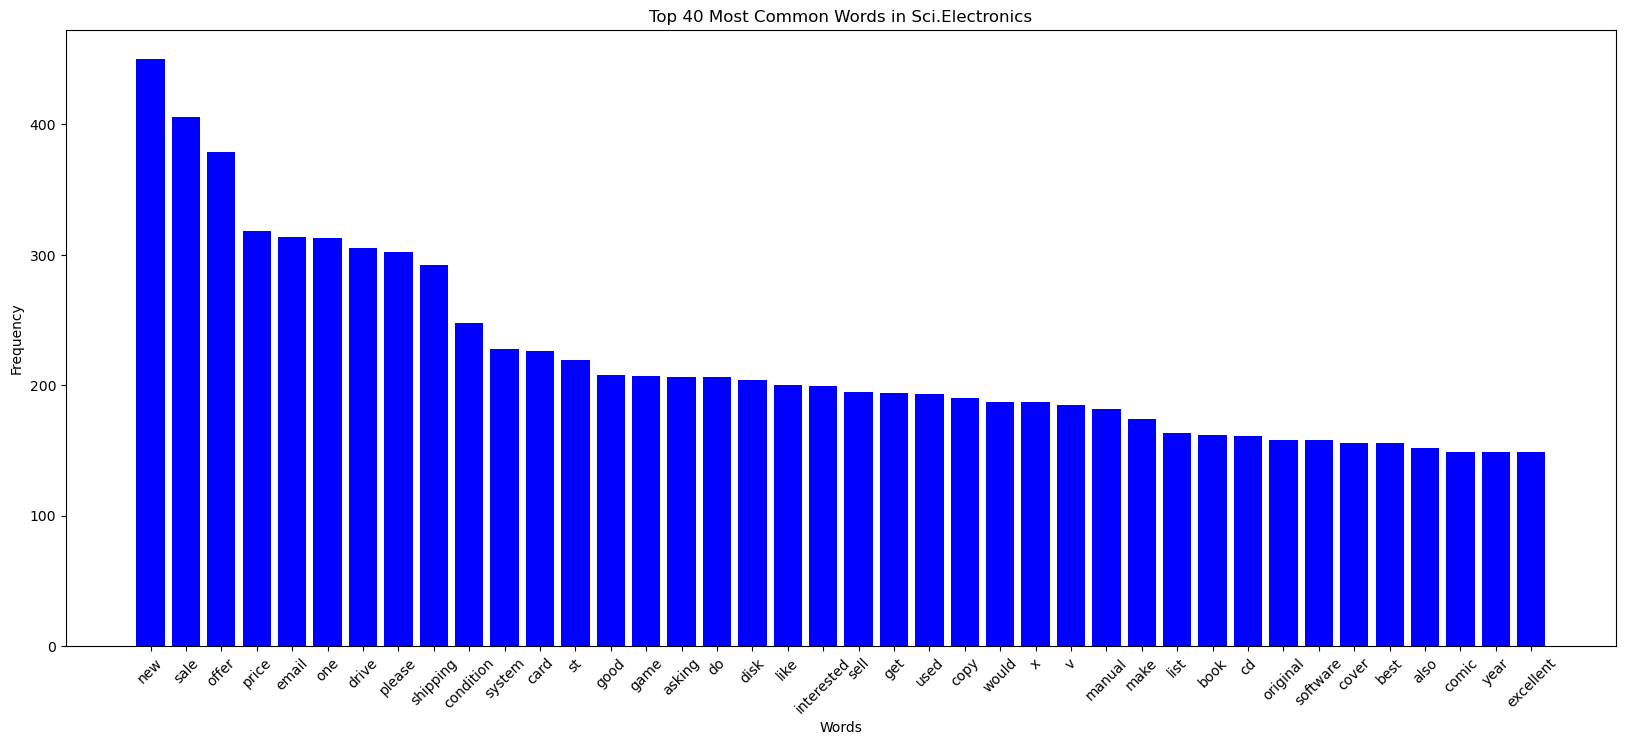

In [310]:
from collections import Counter
import matplotlib.pyplot as plt

# Join all preprocessed documents into one large string
all_text = ' '.join(processed_documents)

# Tokenize the combined text
all_tokens = all_text.split()

# Count the frequency of each word
word_counts = Counter(all_tokens)

# Get the most common words
most_common_words = word_counts.most_common(40)

# Prepare data for plotting
words, counts = zip(*most_common_words)

# Create a bar chart
plt.figure(figsize=(20, 8))
plt.bar(words, counts, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 40 Most Common Words in Sci.Electronics')
plt.xticks(rotation=45)
plt.show()


In [312]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000)

# Fit and transform the processed documents
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_documents)

# Get feature names to use as dataframe column headers
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Sum the TF-IDF scores for each term in the documents
tfidf_sum = np.sum(tfidf_matrix, axis=0)
tfidf_scores = [(word, tfidf_sum[0, idx]) for word, idx in zip(tfidf_feature_names, range(tfidf_sum.shape[1]))]

# Sort words by their TF-IDF scores
sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

# Get the top 20 words
top_tfidf_words = sorted_tfidf_scores[:40]
words, scores = zip(*top_tfidf_words)


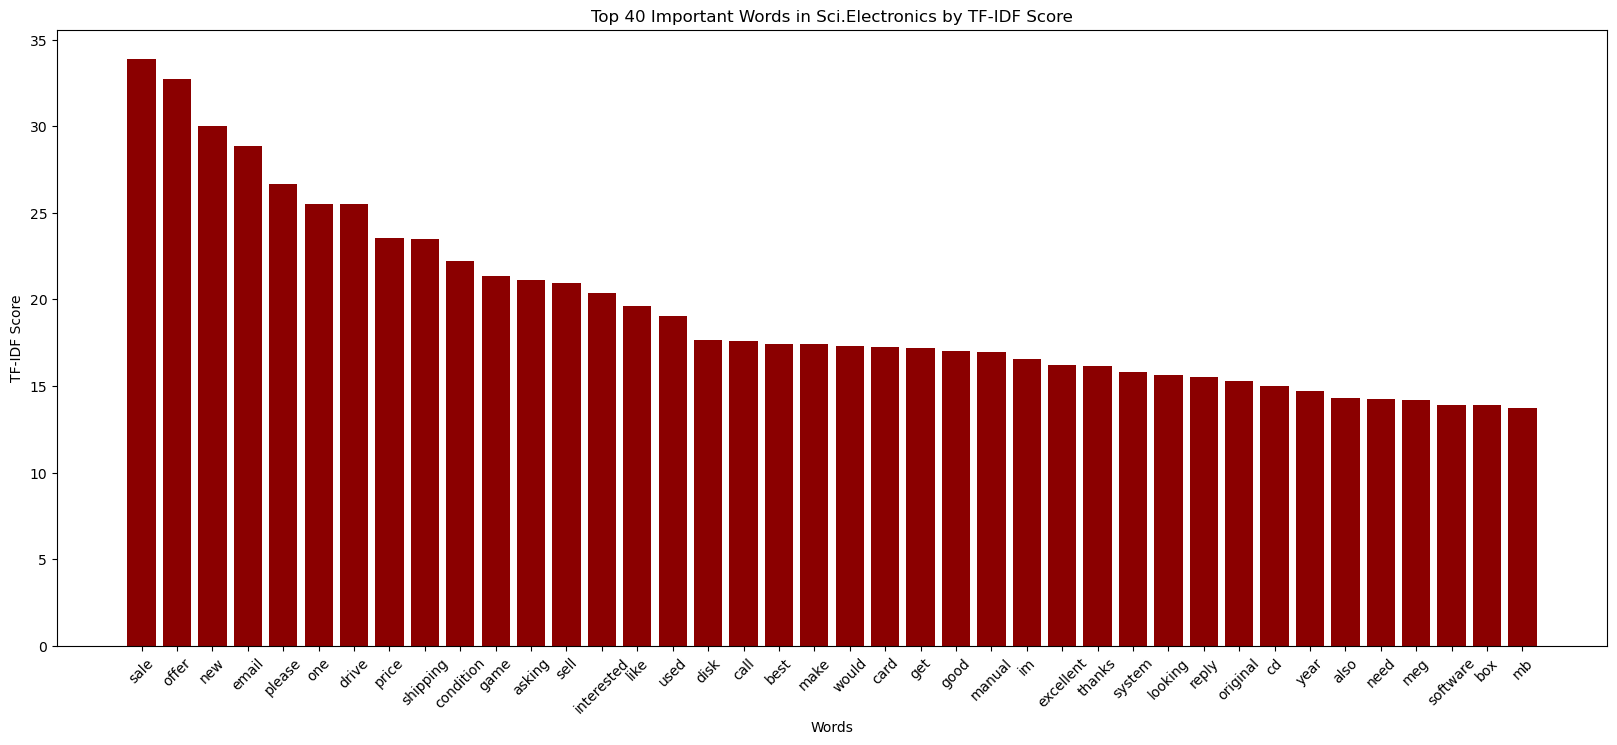

In [314]:
# Plotting the top TF-IDF scores
plt.figure(figsize=(20, 8))
plt.bar(words, scores, color='darkred')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.title('Top 40 Important Words in Sci.Electronics by TF-IDF Score')
plt.xticks(rotation=45)
plt.show()


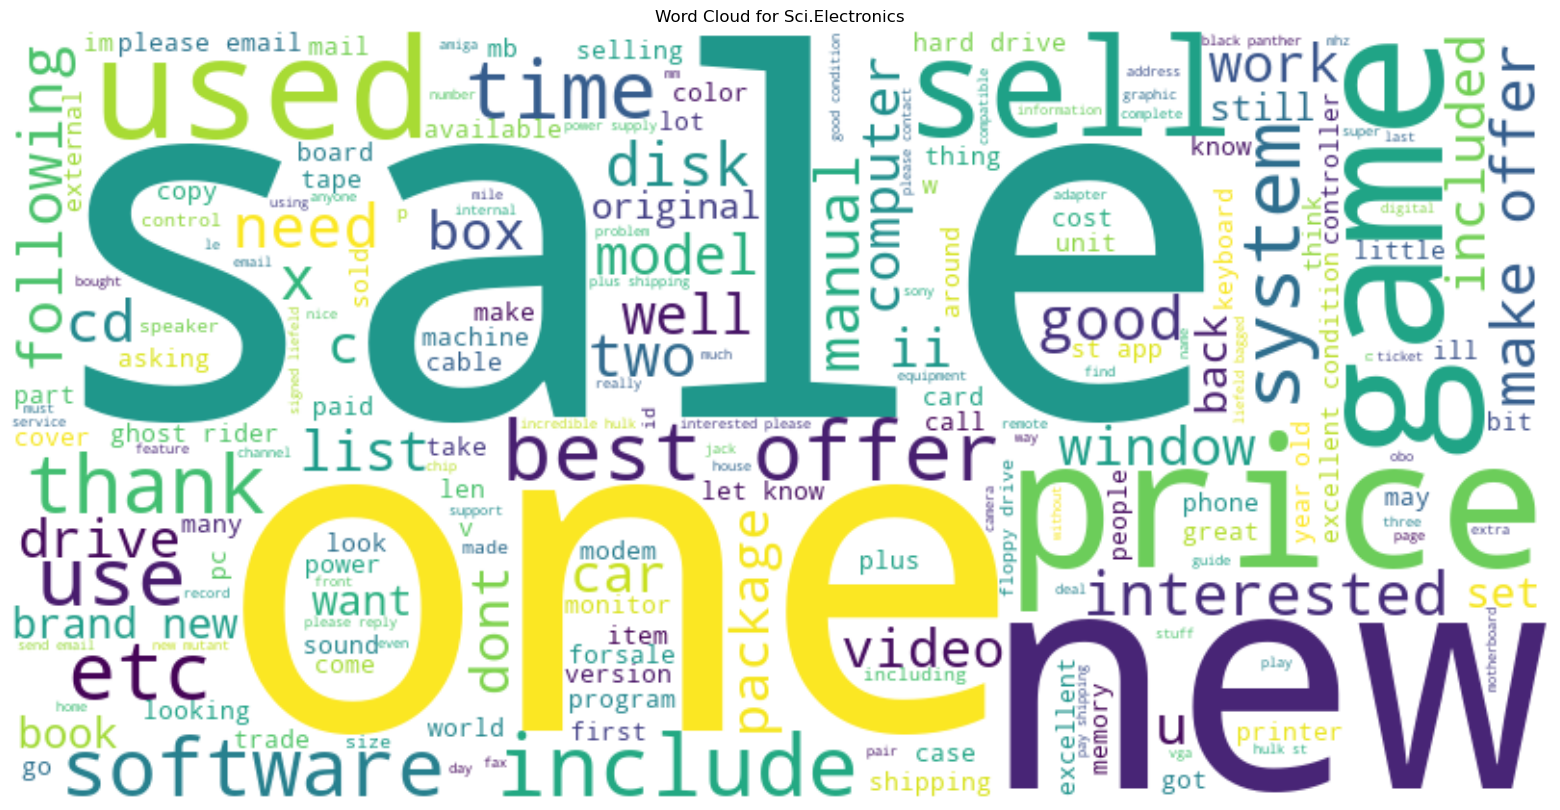

In [316]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud for Sci.Electronics')
plt.show()


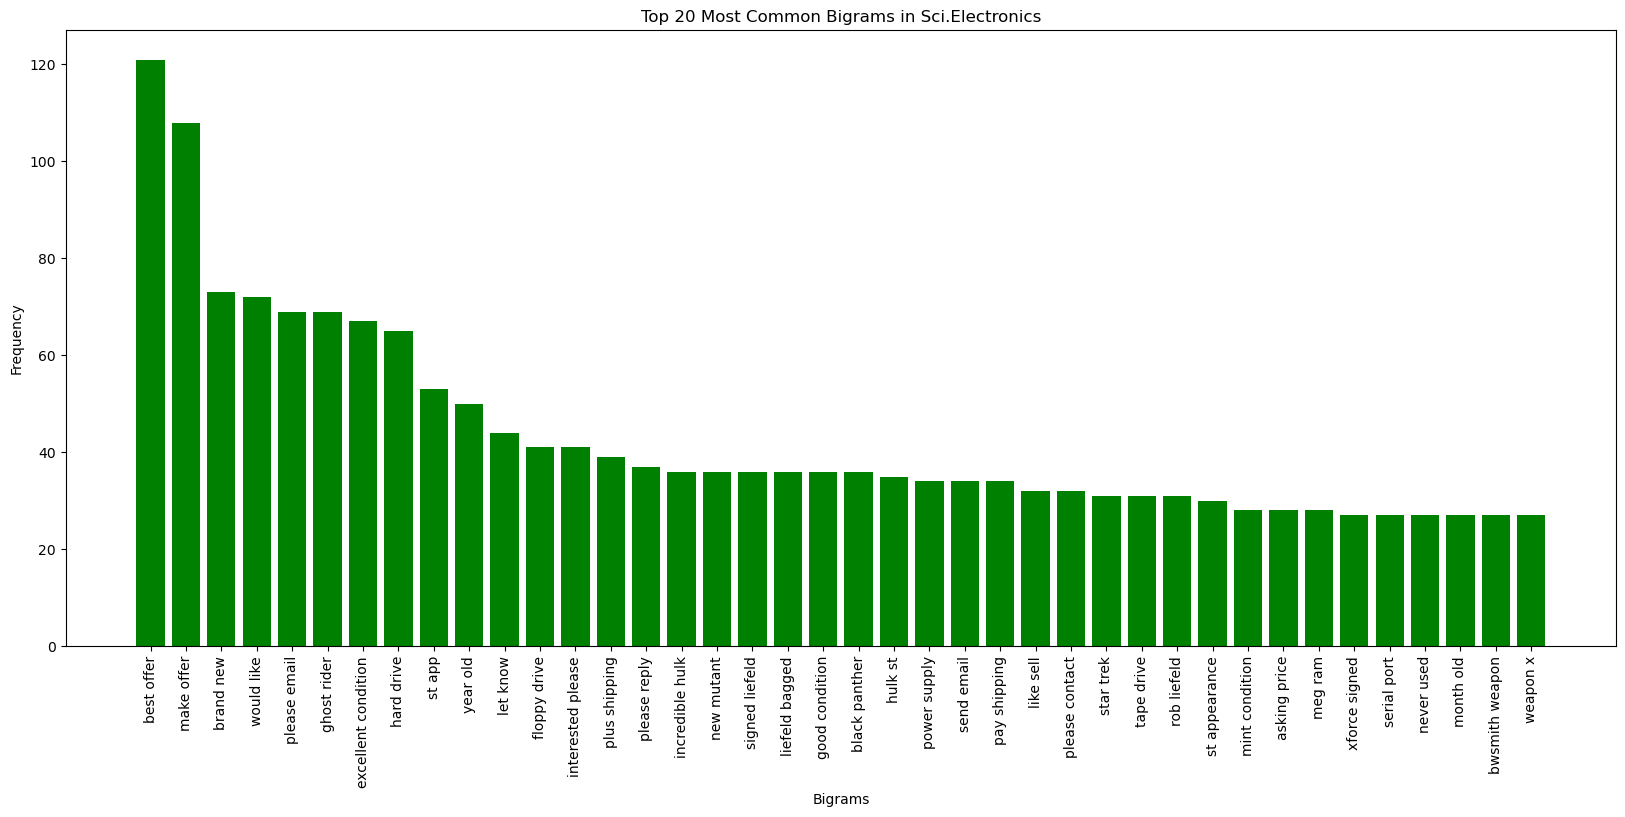

In [320]:
from nltk import bigrams

# Generate bigrams
bigram_tokens = list(bigrams(all_tokens))

# Count the frequency of each bigram
bigram_counts = Counter(bigram_tokens)

# Get the most common bigrams
most_common_bigrams = bigram_counts.most_common(40)
bigram_words, bigram_freq = zip(*[(f"{w[0]} {w[1]}", count) for w, count in most_common_bigrams])

# Create a bar chart for bigrams
plt.figure(figsize=(20, 8))
plt.bar(bigram_words, bigram_freq, color='green')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Bigrams in Sci.Electronics')
plt.xticks(rotation=90)
plt.show()


In [322]:
# Import SentimentIntensityAnalyzer from the nltk.sentiment module
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon, which is necessary for the SentimentIntensityAnalyzer to function
nltk.download('vader_lexicon')

# Create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply the analyzer to each document in the processed_documents list
# This will calculate sentiment scores for each document
sentiments = [sia.polarity_scores(doc) for doc in processed_documents]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saire\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Importing Required Modules

- `from nltk.sentiment import SentimentIntensityAnalyzer`
  - This imports the `SentimentIntensityAnalyzer` class, which provides a way to calculate sentiment scores based on the polarity of text data.

### Setting Up the Sentiment Analyzer

- `nltk.download('vader_lexicon')`
  - Before using the SentimentIntensityAnalyzer, it is necessary to download the VADER lexicon, which the analyzer uses to assess the sentiment of words. VADER includes a list of lexicon features weighted according to their sentiment strength.

### Analyzing Sentiments of Texts

- `sia = SentimentIntensityAnalyzer()`
  - This line creates an instance of the `SentimentIntensityAnalyzer`. This object is now ready to be used to analyze text data.

- `sentiments = [sia.polarity_scores(doc) for doc in processed_documents]`
  - Here, the `polarity_scores` method of the `SentimentIntensityAnalyzer` is applied to each document in the `processed_documents` list. The method returns a dictionary containing the scores for each document in four categories: 
    - `neg`: Negative
    - `neu`: Neutral
    - `pos`: Positive
    - `compound`: A compound score that sums the valence scores of each word in the lexicon, adjusted according to rules, and normalized to be between -1 (most extreme negative) and +1 (most extreme positive).
  - This line uses list comprehension to apply sentiment analysis to each document and collects the results in the `sentiments` list.


This explanation provides a comprehensive overview of how to perform sentiment analysis using NLTK's Sentiment Intensity Analyzer, illustrating the tool's capabilities and ease of use in processing natural language text.

In [337]:
# Assuming 'documents' is a list of raw text documents, and 'processed_documents' is a list
# of text documents that have been cleaned and preprocessed

# Print the raw text of the 101st document in the 'documents' list
print("Original Text: \n", documents[100], "\n")

# Print the processed text of the 101st document in the 'processed_documents' list
print("processed Text: \n", processed_documents[100], "\n")

# Assuming 'sentiments' is a list containing sentiment analysis results for each document
# Print the sentiment analysis results for the 101st document
sentiments[100]


Original Text: 
 I have a few the original IBM 10Mb harddisks for sale. They are actually
Seagate's ST412, MFM, full height,  has the IBM logo and black face plate. 
 
  Each disk is checked and formatted with DOS 6.0. It can be doubled to 
20Mb or so with dblspace or stacker if you so desire.  Have the original IBM
foam fitted boxies and anti-static bags. I am not sure if they were ever 
used, but each drive that is sent out will be quarenteed in good working order. 
 
 $30 each plus shipping cost, (about $5),  

processed Text: 
 original ibm mb harddisks sale actually seagates st mfm full height ibm logo black face plate disk checked formatted do doubled mb dblspace stacker desire original ibm foam fitted boxies antistatic bag sure ever used drive sent quarenteed good working order plus shipping cost 



{'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compound': 0.8885}

### Print Raw and Processed Text Along with Sentiment Scores

- **Print Raw Document**:
  - `print(documents[100])`: This line prints the raw text of the 101st document from the `documents` list. This list contains original text data loaded from a dataset or a file. It's essential to view the raw text to understand the initial data state before any processing.

- **Print Processed Document**:
  - `print(processed_documents[100])`: This line prints the processed version of the same document. The `processed_documents` list contains the text after it has undergone various preprocessing steps like lowercasing, removing special characters, stopwords, and potentially stemming or lemmatization. Viewing the processed text helps verify the effectiveness of the preprocessing steps.

- **Print Sentiment Analysis Results**:
  - `sentiments[100]`: This line prints the sentiment scores of the 101st document, provided by the sentiment analysis model (like NLTK's Sentiment Intensity Analyzer). The `sentiments` list holds dictionaries where each dictionary contains sentiment scores such as 'neg' (negative), 'neu' (neutral), 'pos' (positive), and 'compound' (aggregated score). 


This approach is useful in scenarios where one needs to compare the original and processed texts to ensure that the preprocessing is aligned with the analysis objectives. Additionally, displaying the sentiment scores alongside these texts provides a direct correlation between the processed text and its perceived sentiment, aiding in tasks such as content moderation, customer feedback analysis, or market research.


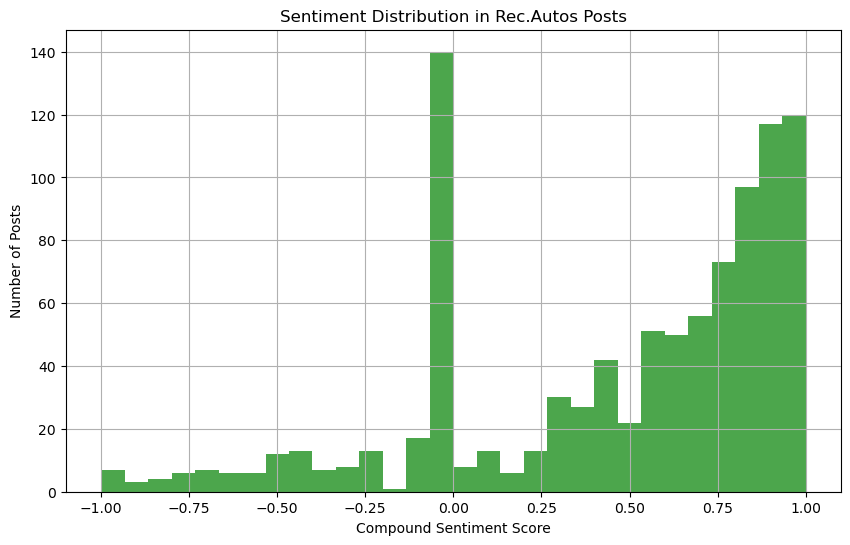

In [342]:
# Extracting the compound sentiment scores from each sentiment analysis result
# This list comprehension iterates over each sentiment dictionary in the 'sentiments' list
# and extracts the 'compound' key's value, which represents the overall sentiment score.
compound_scores = [sentiment['compound'] for sentiment in sentiments]

# Initialize a new figure for plotting, setting the figure size
plt.figure(figsize=(10, 6))

# Create a histogram of the compound sentiment scores
# bins=30 specifies that the data should be divided into 30 bins for granularity
# color='green' sets the color of the histogram bars to green
# alpha=0.7 sets the transparency level of the bars, making them 70% opaque
plt.hist(compound_scores, bins=30, color='green', alpha=0.7)

# Set the title of the plot
plt.title('Sentiment Distribution in Rec.Autos Posts')

# Label the x-axis as 'Compound Sentiment Score'
plt.xlabel('Compound Sentiment Score')

# Label the y-axis as 'Number of Posts'
plt.ylabel('Number of Posts')

# Enable grid lines for better readability of the plot
plt.grid(True)

# Display the plot
plt.show()


### Visualizing Sentiment Distribution

### Data Preparation for Visualization

- **Extract Compound Sentiment Scores**:
  - `compound_scores = [sentiment['compound'] for sentiment in sentiments]`: This line extracts the 'compound' scores from each sentiment analysis result stored in `sentiments`. The compound score is a normalized, weighted composite score computed by the VADER algorithm.

### Plotting the Histogram

- **Initialize Figure**:
  - `plt.figure(figsize=(10, 6))`: Initializes a new figure for plotting with dimensions 10 inches wide by 6 inches tall.

- **Histogram Creation**:
  - `plt.hist(compound_scores, bins=30, color='green', alpha=0.7)`: Plots a histogram of the `compound_scores`. The `bins` parameter specifies how many bins the data should be divided into, which affects the granularity of the histogram. The `color` and `alpha` parameters control the appearance of the histogram bars.

This approach is particularly useful for sentiment analysis results presentation, allowing stakeholders to quickly grasp the overall emotional tone distribution within a dataset, such as customer feedback or social media posts.


## Future Works and Enhancements

### 1. **Deepen Sentiment Analysis**
- **Expand Lexicon**: Enhance the sentiment analysis model by incorporating domain-specific lexicons that may capture sentiments more accurately in different contexts, such as automotive, technology, or health.
- **Contextual Sentiment Analysis**: Implement context-aware sentiment analysis algorithms that consider the surrounding text and overall context, which could improve accuracy over simple polarity scores.

### 2. **Advanced Text Processing**
- **Semantic Analysis**: Integrate semantic analysis tools to understand the meanings behind words in context rather than just isolated sentiment scores. Techniques like Latent Semantic Analysis (LSA) or Neural Language Models could be explored.
- **Syntax Analysis**: Implement syntax parsing to understand the grammatical structure of sentences, which can help in identifying the sentiment targets more accurately.

### 3. **Machine Learning Integration**
- **Predictive Modeling**: Use the processed text data to build predictive models that can, for example, forecast trends based on sentiment trajectories over time.
- **Classification Models**: Develop classification models to categorize text not just by sentiment but also by intent, such as complaint, inquiry, or praise, which could be particularly useful for customer service enhancements.

### 4. **Data Enrichment**
- **Incorporate Multimodal Data**: Combine text data with other data types, such as images or videos, where available. For instance, analyzing customer reviews that include both text and images to gain a more comprehensive understanding of sentiments.
- **Time Series Analysis**: Apply time series analysis to sentiment data to identify trends and patterns over time, aiding in predictive analytics and strategic planning.

### 5. **Interactive Dashboards**
- **Visualization Tools**: Develop interactive dashboards that allow users to explore sentiment analysis results in real-time, with capabilities to drill down into specific data points, time periods, or sentiment scores.
- **Real-time Analysis**: Implement systems that perform real-time sentiment analysis and visualization, providing immediate feedback, which is especially valuable for social media monitoring and response management.

### 6. **Expand Data Sources**
- **Diverse Data Collection**: Expand the dataset to include a broader range of sources, such as social media platforms, online forums, and customer interviews, to build a more robust sentiment analysis model.
- **Cross-Language Analysis**: Adapt the system to handle multiple languages, enhancing its applicability in global markets and among diverse user demographics.

### 7. **Ethical Considerations**
- **Bias Mitigation**: Regularly evaluate the sentiment analysis models for bias in sentiment detection across different demographics or topics. Implement adjustments to reduce any identified biases.
- **Privacy Compliance**: Ensure that the text data processing complies with privacy regulations, such as GDPR or CCPA, especially when dealing with user-generated content.
